# PREDICTING HIGH-INCOME CONSUMERS USING MACHINE LEARNING ALGORITHMS

In [60]:
# import libraries
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats import skew

In [61]:
# load the data
consumer_data = pd.read_csv('Project 01 - Data.csv', index_col = 'id')

In [62]:
# displaying 20 rows of consumer data
consumer_data.head(10)

,age,employer_type,highest_education_completed,marital_status,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,native_country_code,high_income
id,,,,,,,,,,,,
1,27,non_government,bachelors_degree,married,0,3,1,0,0,40,20,0.0
2,44,government_local,high_school,divorced,2,3,0,0,0,40,20,0.0
3,35,non_government,high_school,married,10,3,1,0,0,40,20,0.0
4,19,government_federal,some_college,never_married,4,3,1,0,0,20,5,0.0
5,42,non_government,high_school,married,8,3,1,0,0,30,20,0.0
6,32,non_government,high_school,married,7,3,0,0,0,20,20,0.0
7,45,government_state,masters_degree,married,1,3,1,0,0,60,20,1.0
8,27,non_government,associates_degree_vocational,divorced,2,3,0,0,0,40,20,0.0
9,29,non_government,some_college,married,2,3,0,0,0,40,20,1.0


In [63]:
# statistics of data using describe
consumer_data.describe()

,age,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,native_country_code,high_income
count,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,23000.000000,20000.000000
mean,37.751391,4.008000,2.806652,0.642652,1629.516435,253.363348,41.260478,19.765913,0.192850
std,12.573718,3.243046,0.530113,0.479229,7335.194075,1186.247358,11.287738,2.735127,0.394546
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
25%,28.000000,1.000000,3.000000,0.000000,0.000000,0.000000,40.000000,20.000000,0.000000
50%,36.000000,3.000000,3.000000,1.000000,0.000000,0.000000,40.000000,20.000000,0.000000
75%,46.000000,7.000000,3.000000,1.000000,0.000000,0.000000,45.000000,20.000000,0.000000
max,90.000000,12.000000,3.000000,1.000000,117857.000000,12980.000000,99.000000,38.000000,1.000000


In [64]:
# More information of the data frame
print(consumer_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23000 entries, 1 to 23000
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          23000 non-null  int64  
 1   employer_type                23000 non-null  object 
 2   highest_education_completed  23000 non-null  object 
 3   marital_status               23000 non-null  object 
 4   occupation_code              23000 non-null  int64  
 5   race_code                    23000 non-null  int64  
 6   gender                       23000 non-null  int64  
 7   capital_gains                23000 non-null  int64  
 8   capital_losses               23000 non-null  int64  
 9   hours_worked_per_week        23000 non-null  int64  
 10  native_country_code          23000 non-null  int64  
 11  high_income                  20000 non-null  float64
dtypes: float64(1), int64(8), object(3)
memory usage: 2.3+ MB
None


In [65]:
# Displaying counts of categorical columns
print("Variable 'Employer_type':")
consumer_data.employer_type.value_counts()

Variable 'Employer_type':


non_government                    16830
self_employed_not_incorporated     1837
government_local                   1712
government_state                   1101
government_federal                  769
self_employed_incorporated          751
Name: employer_type, dtype: int64

In [66]:
print("\n Variable 'highest_education_completed' :")
consumer_data.highest_education_completed.value_counts()


 Variable 'highest_education_completed' :


high_school                     8041
some_college                    6259
bachelors_degree                4456
masters_degree                  1393
associates_degree_vocational    1208
associates_degree_academic       928
professional_degree              403
doctoral_degree                  312
Name: highest_education_completed, dtype: int64

In [67]:
print("\n Variable 'marital_status' :")
consumer_data.marital_status.value_counts()


 Variable 'marital_status' :


married          10124
never_married     7965
divorced          3588
separated          727
widowed            596
Name: marital_status, dtype: int64

In [68]:
print("\n Variable 'occupation_code' :")
consumer_data.occupation_code.value_counts()


 Variable 'occupation_code' :


1     3439
2     3271
0     3211
6     2842
3     2752
7     2254
10    1285
8     1017
4      908
5      796
11     651
9      510
12      64
Name: occupation_code, dtype: int64

In [69]:
print("\n Variable 'race_code' :")
consumer_data.race_code.value_counts()


 Variable 'race_code' :


3    19770
2     2234
1      775
0      221
Name: race_code, dtype: int64

In [70]:
print("\n Variable 'native_country_code' :")
consumer_data.native_country_code.value_counts()


 Variable 'native_country_code' :


20    21360
27      194
15      159
7       104
22       84
9        79
26       64
19       64
5        64
3        60
18       57
1        56
12       51
21       49
16       47
4        40
30       39
2        38
11       35
10       32
24       31
6        25
23       23
14       22
29       22
32       21
34       20
8        19
36       16
25       16
17       15
28       13
31       13
13       13
0        13
37       11
33       11
35       10
38       10
Name: native_country_code, dtype: int64

In [71]:
# Dummies for Employer Type
one_hot_EType = pd.get_dummies(consumer_data.employer_type, prefix = 'EmpType', drop_first=True)

# First 5 rows
one_hot_EType.head()

,EmpType_government_local,EmpType_government_state,EmpType_non_government,EmpType_self_employed_incorporated,EmpType_self_employed_not_incorporated
id,,,,,
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,0,0,0,0
5,0,0,1,0,0


In [72]:
# Dummies for Highest Education Completed
one_hot_highEd = pd.get_dummies(consumer_data.highest_education_completed, prefix = 'highEd', drop_first=True)

# First 5 rows
one_hot_highEd.head()

,highEd_associates_degree_vocational,highEd_bachelors_degree,highEd_doctoral_degree,highEd_high_school,highEd_masters_degree,highEd_professional_degree,highEd_some_college
id,,,,,,,
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0


In [73]:
# Dummies for Marital Status
one_hot_MStatus = pd.get_dummies(consumer_data.marital_status, prefix = 'MStaus', drop_first=True)

# First 5 rows
one_hot_MStatus.head()

,MStaus_married,MStaus_never_married,MStaus_separated,MStaus_widowed
id,,,,
1,1,0,0,0
2,0,0,0,0
3,1,0,0,0
4,0,1,0,0
5,1,0,0,0


In [74]:
# Dummies for Occupational Code
one_hot_OccCode = pd.get_dummies(consumer_data.occupation_code, prefix = 'OccCode', drop_first=True)

# First 5 rows
one_hot_OccCode.head()

,OccCode_1,OccCode_2,OccCode_3,OccCode_4,OccCode_5,OccCode_6,OccCode_7,OccCode_8,OccCode_9,OccCode_10,OccCode_11,OccCode_12
id,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0


In [75]:
# Dummies for Race Code
one_hot_Race = pd.get_dummies(consumer_data.race_code, prefix = 'Race')

# First 5 rows
one_hot_Race.head()

,Race_0,Race_1,Race_2,Race_3
id,,,,
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,0,0,0,1


In [76]:
# Dummies for Native Country Code
one_hot_Country = pd.get_dummies(consumer_data.native_country_code, prefix = 'Country', drop_first=True)

# First 5 rows
one_hot_Country.head()

,Country_1,Country_2,Country_3,Country_4,Country_5,Country_6,Country_7,Country_8,Country_9,Country_10,...,Country_29,Country_30,Country_31,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38
id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#add the new set of dummy variables into the original 'df' dataframe
consumer_data = consumer_data.join(one_hot_EType)
consumer_data = consumer_data.join(one_hot_highEd)
consumer_data = consumer_data.join(one_hot_MStatus)
consumer_data = consumer_data.join(one_hot_OccCode)
consumer_data = consumer_data.join(one_hot_Race)
consumer_data = consumer_data.join(one_hot_Country)

#preview the first few rows
consumer_data.head()

,age,employer_type,highest_education_completed,marital_status,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,...,Country_29,Country_30,Country_31,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38
id,,,,,,,,,,,,,,,,,,,,,
1,27,non_government,bachelors_degree,married,0,3,1,0,0,40,...,0,0,0,0,0,0,0,0,0,0
2,44,government_local,high_school,divorced,2,3,0,0,0,40,...,0,0,0,0,0,0,0,0,0,0
3,35,non_government,high_school,married,10,3,1,0,0,40,...,0,0,0,0,0,0,0,0,0,0
4,19,government_federal,some_college,never_married,4,3,1,0,0,20,...,0,0,0,0,0,0,0,0,0,0
5,42,non_government,high_school,married,8,3,1,0,0,30,...,0,0,0,0,0,0,0,0,0,0


In [78]:
#  ['age', 'gender', 'capital_gains', 'capital_losses', 'hours_worked_per_week', 'high_income']
# model_data = consumer_data
model_data = consumer_data.loc[:, ~consumer_data.columns.isin(['high_income', 'id'])]
model_data = model_data.drop(columns = ['employer_type', 'highest_education_completed', 'marital_status', 'occupation_code', 'race_code', 'native_country_code'])
predictors = consumer_data.columns
Final_preds = model_data.columns
print(predictors)

Index(['age', 'employer_type', 'highest_education_completed', 'marital_status',
       'occupation_code', 'race_code', 'gender', 'capital_gains',
       'capital_losses', 'hours_worked_per_week', 'native_country_code',
       'high_income', 'EmpType_government_local', 'EmpType_government_state',
       'EmpType_non_government', 'EmpType_self_employed_incorporated',
       'EmpType_self_employed_not_incorporated',
       'highEd_associates_degree_vocational', 'highEd_bachelors_degree',
       'highEd_doctoral_degree', 'highEd_high_school', 'highEd_masters_degree',
       'highEd_professional_degree', 'highEd_some_college', 'MStaus_married',
       'MStaus_never_married', 'MStaus_separated', 'MStaus_widowed',
       'OccCode_1', 'OccCode_2', 'OccCode_3', 'OccCode_4', 'OccCode_5',
       'OccCode_6', 'OccCode_7', 'OccCode_8', 'OccCode_9', 'OccCode_10',
       'OccCode_11', 'OccCode_12', 'Race_0', 'Race_1', 'Race_2', 'Race_3',
       'Country_1', 'Country_2', 'Country_3', 'Country_4', 'Cou

In [79]:
consumer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,23000.0,37.751391,12.573718,18.0,28.0,36.0,46.0,90.0
occupation_code,23000.0,4.008000,3.243046,0.0,1.0,3.0,7.0,12.0
race_code,23000.0,2.806652,0.530113,0.0,3.0,3.0,3.0,3.0
gender,23000.0,0.642652,0.479229,0.0,0.0,1.0,1.0,1.0
capital_gains,23000.0,1629.516435,7335.194075,0.0,0.0,0.0,0.0,117857.0
...,...,...,...,...,...,...,...,...
Country_34,23000.0,0.000870,0.029476,0.0,0.0,0.0,0.0,1.0
Country_35,23000.0,0.000435,0.020847,0.0,0.0,0.0,0.0,1.0
Country_36,23000.0,0.000696,0.026367,0.0,0.0,0.0,0.0,1.0
Country_37,23000.0,0.000478,0.021864,0.0,0.0,0.0,0.0,1.0


In [80]:
# Correlation Matrix
round(model_data.corr(), 3)

,age,gender,capital_gains,capital_losses,hours_worked_per_week,EmpType_government_local,EmpType_government_state,EmpType_non_government,EmpType_self_employed_incorporated,EmpType_self_employed_not_incorporated,...,Country_29,Country_30,Country_31,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38
age,1.000,0.055,0.123,0.064,0.096,0.080,0.015,-0.216,0.111,0.151,...,-0.004,-0.008,-0.010,0.014,0.014,-0.007,0.005,-0.002,0.006,0.001
gender,0.055,1.000,0.039,0.038,0.215,-0.053,-0.024,-0.055,0.081,0.110,...,-0.006,0.011,0.002,0.014,-0.004,0.007,-0.002,-0.011,-0.013,0.011
capital_gains,0.123,0.039,1.000,-0.047,0.072,0.000,0.001,-0.043,0.079,0.010,...,-0.006,-0.005,-0.003,0.004,-0.002,-0.002,-0.005,-0.006,-0.005,0.000
capital_losses,0.064,0.038,-0.047,1.000,0.052,0.017,-0.005,-0.032,0.028,0.013,...,0.000,0.008,-0.005,0.010,-0.005,0.001,-0.004,-0.006,0.007,-0.004
hours_worked_per_week,0.096,0.215,0.072,0.052,1.000,0.005,-0.043,-0.094,0.129,0.096,...,-0.005,-0.003,0.002,0.008,-0.009,0.002,0.004,0.018,-0.003,0.009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Country_34,-0.007,0.007,-0.002,0.001,0.002,-0.008,-0.007,0.015,-0.005,-0.003,...,-0.001,-0.001,-0.001,-0.001,-0.001,1.000,-0.001,-0.001,-0.001,-0.001
Country_35,0.005,-0.002,-0.005,-0.004,0.004,-0.006,0.005,0.003,-0.004,0.002,...,-0.001,-0.001,-0.000,-0.001,-0.000,-0.001,1.000,-0.001,-0.000,-0.000
Country_36,-0.002,-0.011,-0.006,-0.006,0.018,-0.007,0.002,-0.010,0.023,0.010,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,1.000,-0.001,-0.001
Country_37,0.006,-0.013,-0.005,0.007,-0.003,-0.006,0.004,0.004,0.007,-0.006,...,-0.001,-0.001,-0.001,-0.001,-0.000,-0.001,-0.000,-0.001,1.000,-0.000


> Marital Status, Capital Gains, Bachelors Degree seem to be directly proportional showing higher correlation among all.

> Gender and Marital_status = 0.39

> Completing high school education seem contribute most into less higher income(negatively or indirectly proportional).

> Occupation code 1 shows high correlation to master degree and professional degree.

['age', 'gender', 'capital_gains', 'capital_losses', 'hours_worked_per_week']


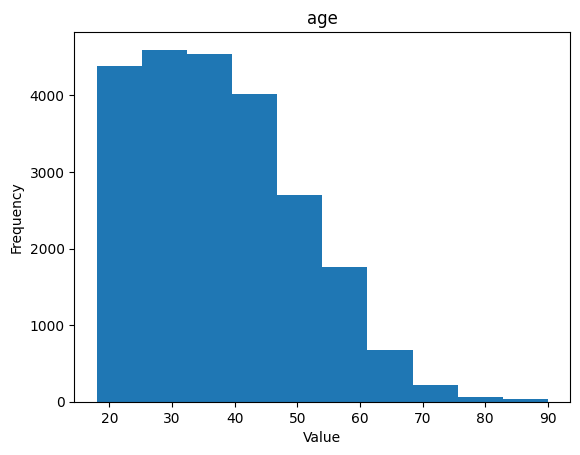

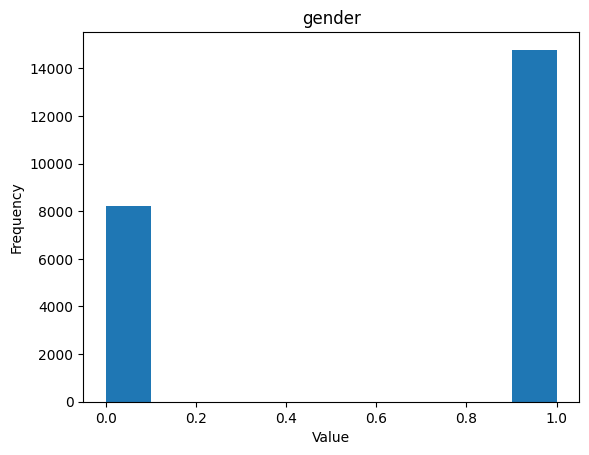

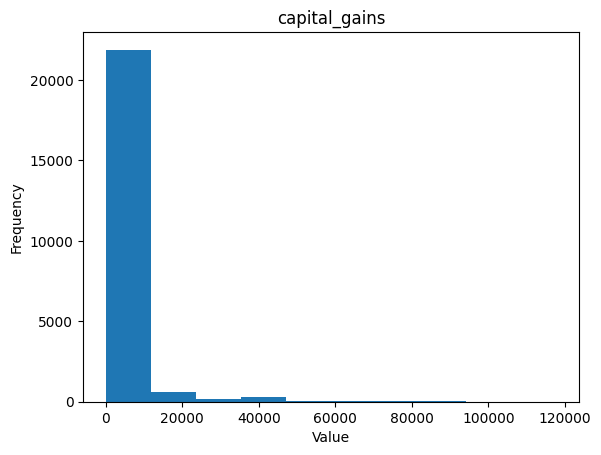

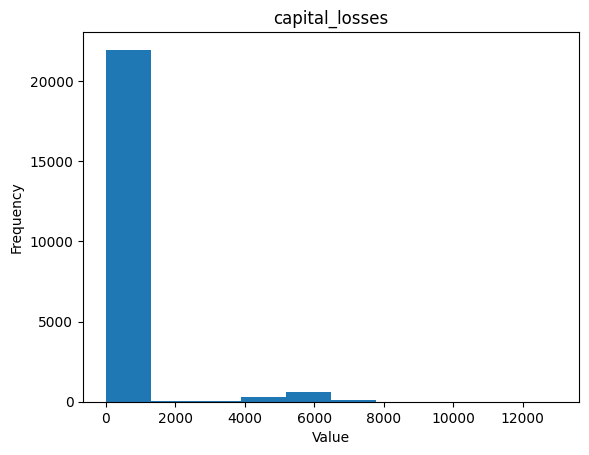

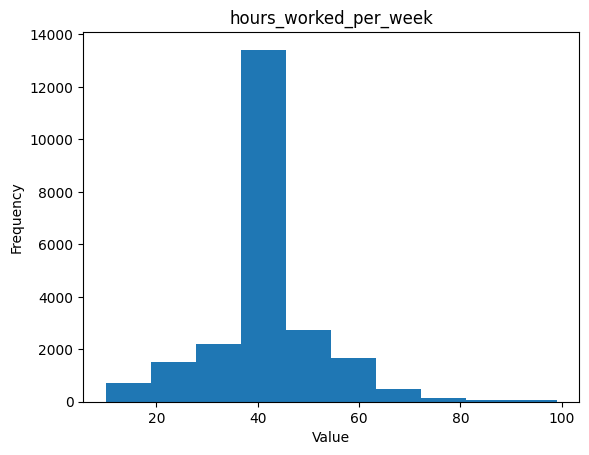

In [52]:
# list of numeric columns in the dataframe
num_cols = model_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_cols)

# loop through the numeric columns and generate histograms for each column
for col in num_cols:
    plt.hist(model_data[col], bins=10)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [53]:
variables_skew = ['age', 'capital_losses', 'capital_gains', 'hours_worked_per_week']
print(model_data[variables_skew].skew())

age                      0.625753
capital_losses           4.661796
capital_gains            6.091273
hours_worked_per_week    0.602260
dtype: float64


In [120]:
# Applying transformations to skewed variables
model_data['age'] = [math.log(x) for x in model_data['age']]
model_data['capital_gains'] = [math.log(x + 1) for x in model_data['capital_gains']]
model_data['capital_losses'] = [math.log(x + 1) for x in model_data['capital_losses']]
model_data['hours_worked_per_week'] = [math.log(x) for x in model_data['hours_worked_per_week']]

['age', 'gender', 'capital_gains', 'capital_losses', 'hours_worked_per_week']


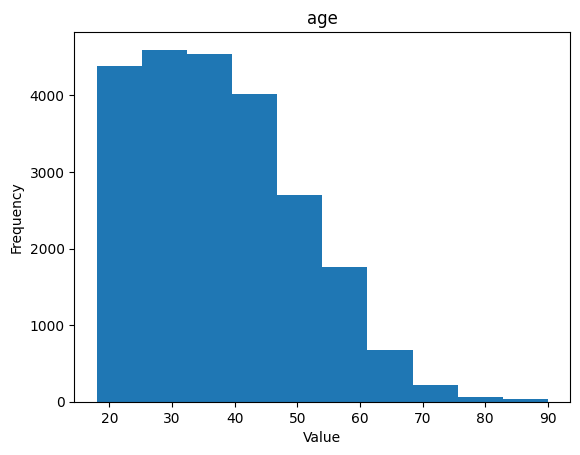

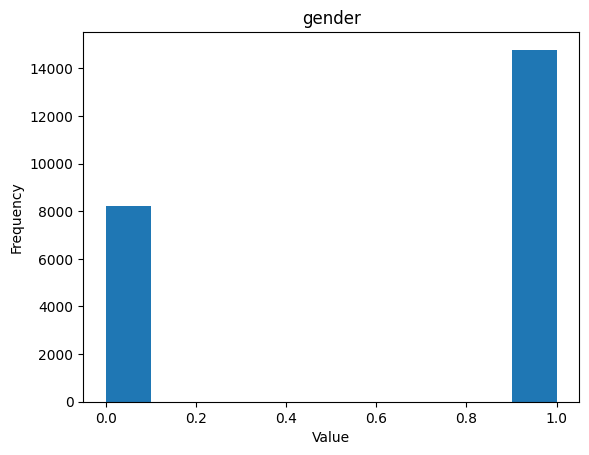

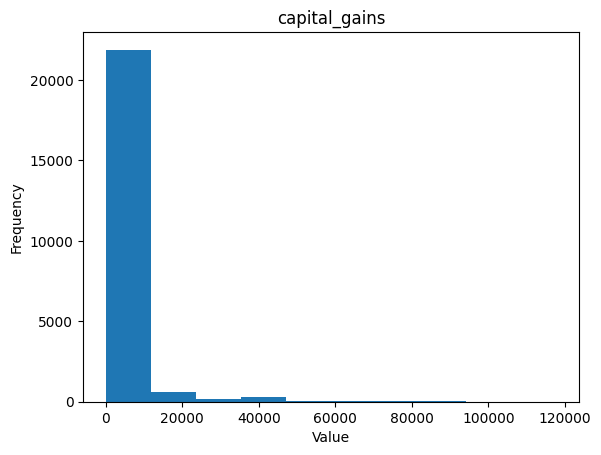

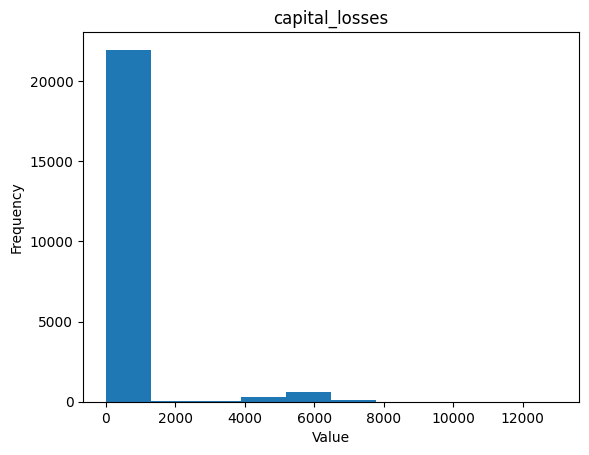

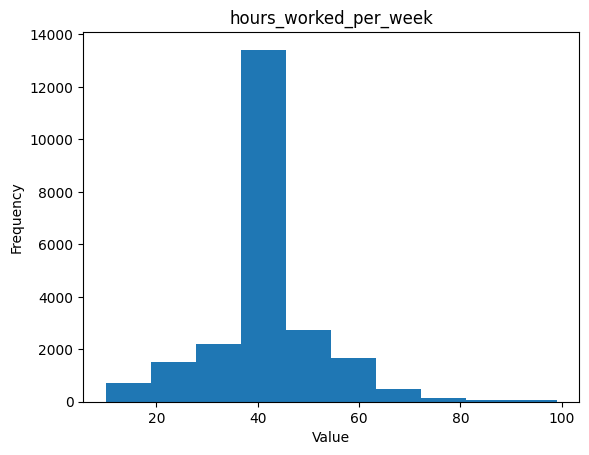

In [54]:
# list of numeric columns in the dataframe
num_cols = model_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(num_cols)

# loop through the numeric columns and generate histograms for each column
for col in num_cols:
    plt.hist(model_data[col], bins=10)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

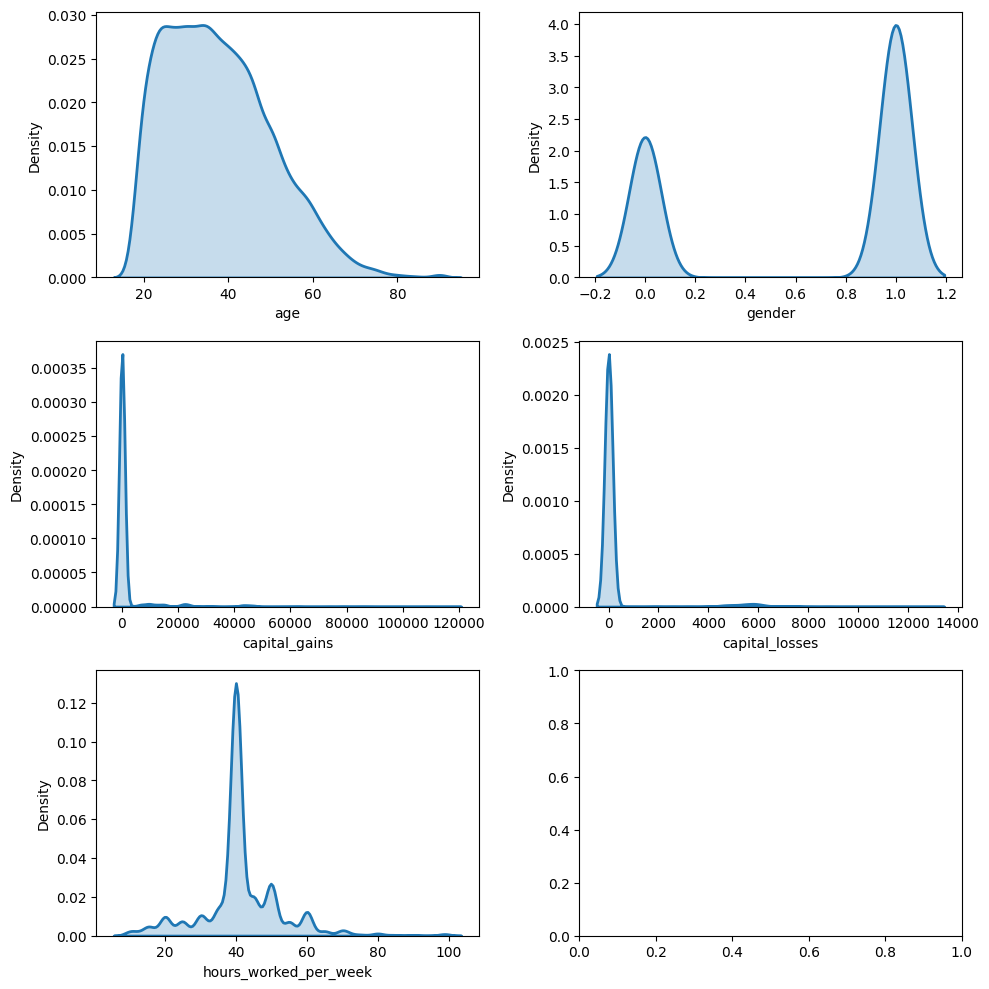

In [55]:
# get the list of numeric columns in the dataframe
num_cols = model_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# calculate the number of rows and columns needed for the subplots
rows, cols = 3, 2

# create the subplots
fig, ax = plt.subplots(rows, cols, figsize=(10, 10))

# loop through each numeric column and generate a density plot for each column
i = 0
for row in range(rows):
    for col in range(cols):
        if i < len(num_cols):
            sns.kdeplot(model_data[num_cols[i]], ax=ax[row, col], fill=True, lw=2)
        i += 1

plt.tight_layout()
plt.show()


In [81]:
#create a dataframe containing only those rows for which an income prediction needs to be made
df_predict = consumer_data[pd.isnull(consumer_data.high_income) == True].copy()
#remove all incomplete rows from the 'df' dataframe
consumer_data = consumer_data[pd.isnull(consumer_data.high_income) == False].copy()

In [82]:
df_predict

,age,employer_type,highest_education_completed,marital_status,occupation_code,race_code,gender,capital_gains,capital_losses,hours_worked_per_week,...,Country_29,Country_30,Country_31,Country_32,Country_33,Country_34,Country_35,Country_36,Country_37,Country_38
id,,,,,,,,,,,,,,,,,,,,,
20001,35,non_government,bachelors_degree,married,6,3,1,0,0,40,...,0,0,0,0,0,0,0,0,0,0
20002,49,non_government,associates_degree_academic,married,3,3,1,0,0,45,...,0,0,0,0,0,0,0,0,0,0
20003,50,non_government,associates_degree_vocational,separated,1,3,0,0,0,40,...,0,0,0,0,0,0,0,0,0,0
20004,23,non_government,high_school,never_married,3,3,0,0,0,48,...,0,0,0,0,0,0,0,0,0,0
20005,46,non_government,some_college,married,6,1,1,0,0,40,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22996,40,non_government,some_college,never_married,0,3,1,0,0,50,...,0,0,0,0,0,0,0,0,0,0
22997,19,non_government,high_school,never_married,11,3,1,0,0,40,...,0,0,0,0,0,0,0,0,0,0
22998,48,self_employed_incorporated,masters_degree,married,7,3,1,0,0,40,...,0,0,0,0,0,0,0,0,0,0


In [83]:
#split the data into training and testing sets
df_train, df_test = train_test_split(consumer_data.copy(), train_size=0.7, shuffle=True, random_state=42)

In [84]:
from pandas.core import describe
from numpy.ma import count
#display the number of rows in the training set
print("Count of rows in training data:", len(df_train))

#display the number of rows in the testing set
print("Count of rows in testing data:", len(df_test))

Count of rows in training data: 14000
Count of rows in testing data: 6000


In [85]:
#train a logistic regression classifier
model = LogisticRegression(random_state=42, max_iter = 1000)
model.fit(df_train[Final_preds], df_train.high_income)

LogisticRegression(max_iter=1000, random_state=42)

In [86]:
#generate predictions, and save them in a new column named "Has_high_income" in the testing dataframe
df_test['Has_high_income'] = model.predict(df_test[Final_preds])

#view actual and predicted values for the first 20 women in the testing set
df_test[['high_income', 'Has_high_income']].head(40)

,high_income,Has_high_income
id,,
10651,0.0,0.0
2042,0.0,0.0
8669,1.0,0.0
1115,0.0,0.0
13903,0.0,0.0
11964,0.0,0.0
11073,0.0,0.0
3003,0.0,0.0
19772,0.0,0.0


In [87]:
#define a function that prints a confusion matrix and other performance metrics
def print_metrics(actual, predicted):
  tn, fp, fn, tp = confusion_matrix(actual, predicted).ravel()
  total_predictions = tn + fp + fn + tp
  print(' True positive: {} ({:.2f}%)'.format(tp, tp / total_predictions * 100))
  print(' True negative: {} ({:.2f}%)'.format(tn, tn / total_predictions * 100))
  print('False positive: {} ({:.2f}%)'.format(fp, fp / total_predictions * 100))
  print('False negative: {} ({:.2f}%)\n'.format(fn, fn / total_predictions * 100))
  target_names=['does not have high_income', 'Has_high_income']
  print(classification_report(actual, predicted, target_names=target_names, digits=4))

#show the performance of the model on the testing data
print_metrics(df_test.high_income, df_test.Has_high_income)

 True positive: 651 (10.85%)
 True negative: 4510 (75.17%)
False positive: 317 (5.28%)
False negative: 522 (8.70%)

                           precision    recall  f1-score   support

does not have high_income     0.8963    0.9343    0.9149      4827
          Has_high_income     0.6725    0.5550    0.6081      1173

                 accuracy                         0.8602      6000
                macro avg     0.7844    0.7447    0.7615      6000
             weighted avg     0.8525    0.8602    0.8549      6000



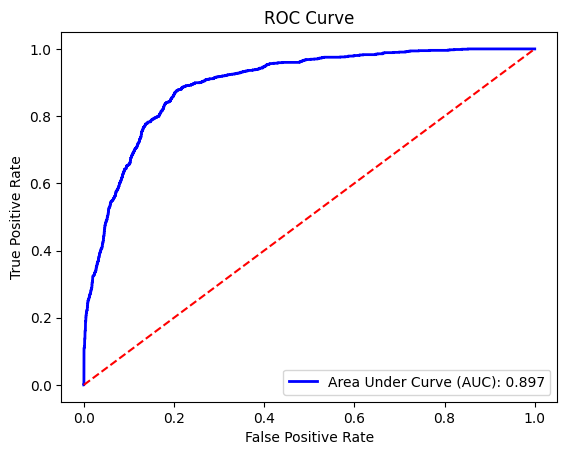

In [88]:
#define a function that generates a ROC curve
def generate_roc_curve(actual, predicted_probabilities):
  fpr, tpr, _ = roc_curve(actual, predicted_probabilities)
  auc = roc_auc_score(actual, predicted_probabilities)
  plt.plot(fpr, tpr, 'b-', lw=2, label='Area Under Curve (AUC): {0:.3f}'.format(auc))
  plt.plot([0, 1], [0, 1], 'r--')
  plt.title('ROC Curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc=4)
  plt.show()

#compute predicted probabilities that each person in the testing set has higher income
predicted_probabilities = model.predict_proba(df_test[Final_preds])[::,1]

#generate a ROC curve for the logistic regression classifier
generate_roc_curve(df_test.high_income, predicted_probabilities)

**K- Nearest Neighbors classifier**

In [93]:
#train a k-nearest neighbors (KNN) classifier
model = KNeighborsClassifier(n_neighbors=15)
model.fit(df_train[Final_preds], df_train.high_income)

#evaluate the performance of the KNN classifier using the test set
df_test['Has_high_income'] = model.predict(df_test[Final_preds])

#show the performance of the model on the testing data
print_metrics(df_test.high_income, df_test.Has_high_income)

 True positive: 502 (8.37%)
 True negative: 4588 (76.47%)
False positive: 239 (3.98%)
False negative: 671 (11.18%)

                           precision    recall  f1-score   support

does not have high_income     0.8724    0.9505    0.9098      4827
          Has_high_income     0.6775    0.4280    0.5246      1173

                 accuracy                         0.8483      6000
                macro avg     0.7749    0.6892    0.7172      6000
             weighted avg     0.8343    0.8483    0.8345      6000



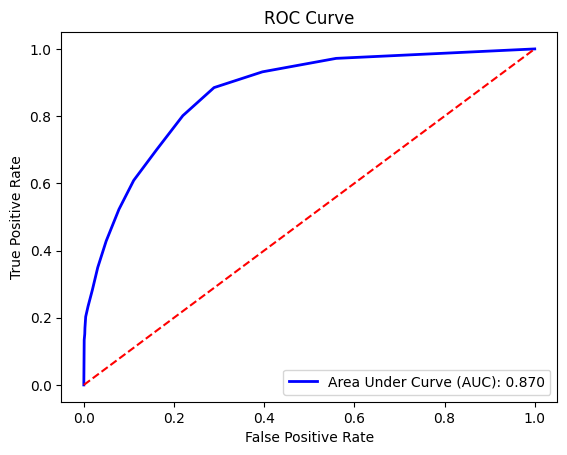

In [94]:
#compute predicted probabilities that each person in the testing set has higher income
predicted_probabilities = model.predict_proba(df_test[Final_preds])[::,1]

#generate a ROC curve for the KNN classifier
generate_roc_curve(df_test.high_income, predicted_probabilities)

**Neural Networks Model**

In [95]:
#import the neural network classifier library
from sklearn.neural_network import MLPClassifier

#define and train the neural network
model = MLPClassifier(random_state=42, max_iter=400, hidden_layer_sizes=(256, 128, 64, 32, 16), 
                      learning_rate='adaptive', early_stopping=False)
model.fit(df_train[Final_preds], df_train.high_income)

#evaluate the performance of the neural network using the test set
df_test['Has_high_income'] = model.predict(df_test[Final_preds])

#show the performance of the model on the testing data
print_metrics(df_test.high_income, df_test.Has_high_income)

 True positive: 473 (7.88%)
 True negative: 4670 (77.83%)
False positive: 157 (2.62%)
False negative: 700 (11.67%)

                           precision    recall  f1-score   support

does not have high_income     0.8696    0.9675    0.9160      4827
          Has_high_income     0.7508    0.4032    0.5247      1173

                 accuracy                         0.8572      6000
                macro avg     0.8102    0.6854    0.7203      6000
             weighted avg     0.8464    0.8572    0.8395      6000



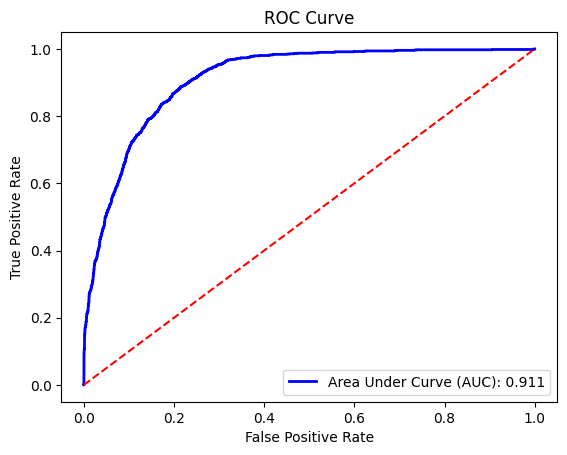

In [96]:
#compute predicted probabilities that each person in the testing set has higher income
predicted_probabilities = model.predict_proba(df_test[Final_preds])[::,1]

#generate a ROC curve for the Neural network classifier
generate_roc_curve(df_test.high_income, predicted_probabilities)

**Classifier: Decision Tree**

In [97]:
#import the neural network classifier library
from sklearn.tree import DecisionTreeClassifier

#define and train the neural network

model = DecisionTreeClassifier(random_state=0)
model.fit(df_train[Final_preds], df_train.high_income)

#evaluate the performance of the neural network using the test set
df_test['Has_high_income'] = model.predict(df_test[Final_preds])

#show the performance of the model on the testing data
print_metrics(df_test.high_income, df_test.Has_high_income)

 True positive: 686 (11.43%)
 True negative: 4378 (72.97%)
False positive: 449 (7.48%)
False negative: 487 (8.12%)

                           precision    recall  f1-score   support

does not have high_income     0.8999    0.9070    0.9034      4827
          Has_high_income     0.6044    0.5848    0.5945      1173

                 accuracy                         0.8440      6000
                macro avg     0.7522    0.7459    0.7489      6000
             weighted avg     0.8421    0.8440    0.8430      6000



**Classifier: Random Forest**

In [98]:
#import the neural network classifier library
from sklearn.ensemble import RandomForestClassifier

#define and train the neural network

model = RandomForestClassifier(random_state=42)
model.fit(df_train[Final_preds], df_train.high_income)

#evaluate the performance of the neural network using the test set
df_test['Has_high_income'] = model.predict(df_test[Final_preds])

#show the performance of the model on the testing data
print_metrics(df_test.high_income, df_test.Has_high_income)

 True positive: 700 (11.67%)
 True negative: 4498 (74.97%)
False positive: 329 (5.48%)
False negative: 473 (7.88%)

                           precision    recall  f1-score   support

does not have high_income     0.9048    0.9318    0.9181      4827
          Has_high_income     0.6803    0.5968    0.6358      1173

                 accuracy                         0.8663      6000
                macro avg     0.7926    0.7643    0.7770      6000
             weighted avg     0.8609    0.8663    0.8629      6000



**Classifier: Stochastic Gradient Descent**

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

#define and train the neural network
sgd_model = SGDClassifier(loss='log', random_state=42)

sgd_model.partial_fit(df_train[Final_preds], df_train.high_income, classes=[0, 1])

#evaluate the performance of the neural network using the test set
df_test['Has_high_income_sgd'] = sgd_model.predict(df_test[Final_preds])

#show the performance of the model on the testing data
print('Stochastic Gradient Metrics:')
print_metrics(df_test.high_income, df_test.Has_high_income_sgd)


Stochastic Gradient Metrics:
 True positive: 355 (5.92%)
 True negative: 4480 (74.67%)
False positive: 347 (5.78%)
False negative: 818 (13.63%)

                           precision    recall  f1-score   support

does not have high_income     0.8456    0.9281    0.8849      4827
          Has_high_income     0.5057    0.3026    0.3787      1173

                 accuracy                         0.8058      6000
                macro avg     0.6757    0.6154    0.6318      6000
             weighted avg     0.7792    0.8058    0.7860      6000



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
